# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0a6 and < 2.0.0

In [1]:
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/src/openscm_runner/run.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0+27.gcddd6d1.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.tools.scmdf import scmdf_to_emissions
from scmdata import ScmDataFrame, ScmRun
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
fair.get_version()

'1.6.0a6+6.gba6010a'

In [6]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmDataFrame(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    )
)

df_fair.head(30)

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  after removing the cwd from sys.path.


time                                                                                                  2015-01-01 00:00:00  \
model   scenario                  region variable                                   unit                                    
AIM/CGE ssp370                    World  Emissions|BC                               Mt BC/yr                     9.727424   
                                         Emissions|C2F6                             kt C2F6/yr                   1.570000   
                                         Emissions|C6F14                            kt C6F14/yr                  0.350000   
                                         Emissions|CF4                              kt CF4/yr                   10.869900   
                                         Emissions|CH4                              Mt CH4/yr                  388.072796   
                                         Emissions|CO                               Mt CO/yr                   934.349885   
                                         Emissions|CO2|MAGICC AFOLU                 Mt CO2/yr                 3517.440000   
                                         Emissions|CO2|MAGICC Fossil and Industrial Mt CO2/yr                35635.286298   
                                         Emissions|HFC125                           kt HFC125/yr                78.790600   
                                         Emissions|HFC134a                          kt HFC134a/yr              201.953400   
                                         Emissions|HFC143a                          kt HFC143a/yr               32.381000   
                                         Emissions|HFC227ea                         kt HFC227ea/yr               3.663300   
                                         Emissions|HFC23                            kt HFC23/yr                 14.485700   
                                         Emissions|HFC245fa                         kt HFC245fa/yr              11.728500   
                                         Emissions|HFC32                            kt HFC32/yr                 38.579200   
                                         Emissions|HFC4310mee                       kt HFC4310mee/yr             1.151600   
                                         Emissions|N2O                              kt N2O/yr                10900.000000   
                                         Emissions|NH3                              Mt NH3/yr                   65.279703   
                                         Emissions|NOx                              Mt NOx/yr                  155.520450   
                                         Emissions|OC                               Mt OC/yr                    34.746024   
                                         Emissions|SF6                              kt SF6/yr                    8.020000   
                                         Emissions|Sulfur                           Mt SO2/yr                  100.771167   
                                         Emissions|VOC                              Mt VOC/yr                  227.244819   
        ssp370-lowNTCF-aerchemmip World  Emissions|BC                               Mt BC/yr                     9.727424   
                                         Emissions|C2F6                             kt C2F6/yr                   1.570000   
                                         Emissions|C6F14                            kt C6F14/yr                  0.350000   
                                         Emissions|CF4                              kt CF4/yr                   10.869900   
                                         Emissions|CH4                              Mt CH4/yr                  388.072796   
                                         Emissions|CO                               Mt CO/yr                   934.349885   
                                         Emissions|CO2|MAGICC AFOLU                 Mt CO2/yr                 3517.440000   


In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {}
        ],  # passing an empty list of an empty dict will run with defaults
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Temperature", 
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

In [8]:
# NBVAL_IGNORE_OUTPUT
# convert to ScmRun for better plotting functionality
x = ScmRun(x.timeseries())
x.head()

time                                                                                                            1765-01-01  \
model scenario region variable                                           unit   climate_model           run_id               
IMAGE ssp119   World  Atmospheric Concentrations|CO2                     ppm    FaIRv1.6.0a6+6.gba6010a 0       278.051522   
                      Effective Radiative Forcing                        W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.046695   
                      Effective Radiative Forcing|Aerosols               W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.005804   
                      Effective Radiative Forcing|Aerosols|Direct Effect W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.001560   
                      Effective Radiative Forcing|Aerosols|Indirect E... W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.004244   

time                                                                                                            1766-01-01  \
model scenario region variable                                           unit   climate_model           run_id               
IMAGE ssp119   World  Atmospheric Concentrations|CO2                     ppm    FaIRv1.6.0a6+6.gba6010a 0       278.068497   
                      Effective Radiative Forcing                        W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.071496   
                      Effective Radiative Forcing|Aerosols               W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.002187   
                      Effective Radiative Forcing|Aerosols|Direct Effect W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.001307   
                      Effective Radiative Forcing|Aerosols|Indirect E... W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.000880   

time                                                                                                            1767-01-01  \
model scenario region variable                                           unit   climate_model           run_id               
IMAGE ssp119   World  Atmospheric Concentrations|CO2                     ppm    FaIRv1.6.0a6+6.gba6010a 0       278.102345   
                      Effective Radiative Forcing                        W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.090380   
                      Effective Radiative Forcing|Aerosols               W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.001185   
                      Effective Radiative Forcing|Aerosols|Direct Effect W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.000954   
                      Effective Radiative Forcing|Aerosols|Indirect E... W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.000230   

time                                                                                                            1768-01-01  \
model scenario region variable                                           unit   climate_model           run_id               
IMAGE ssp119   World  Atmospheric Concentrations|CO2                     ppm    FaIRv1.6.0a6+6.gba6010a 0       278.135813   
                      Effective Radiative Forcing                        W/m**2 FaIRv1.6.0a6+6.gba6010a 0         0.135064   
                      Effective Radiative Forcing|Aerosols               W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.014938   
                      Effective Radiative Forcing|Aerosols|Direct Effect W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.003480   
                      Effective Radiative Forcing|Aerosols|Indirect E... W/m**2 FaIRv1.6.0a6+6.gba6010a 0        -0.011458   

time                                                                                                            1769-01-01  \
model scenario region variable                                           unit   climate_model           run_id               
IMAGE ssp119   World  Atmospheric Concentrations|CO2                     ppm    FaIRv1.6.0a6+6.gba6010a 0       278.168745   
                      Effective Radiative Forcing                        W/m**2 FaIRv1.6.0

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [9]:
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.0a6+6.gba6010a'

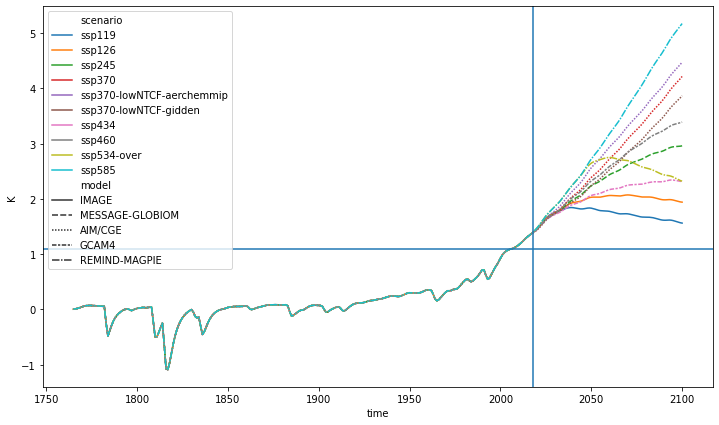

In [10]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Temperature").lineplot(
    hue="scenario", style="model", ax=ax, time_axis="year"
)
ax.axhline(1.1)
ax.axvline(2018)

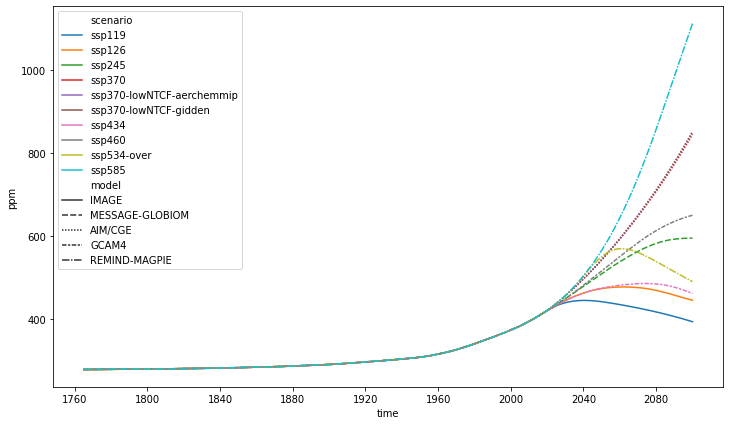

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(
    hue="scenario", style="model", ax=ax
)

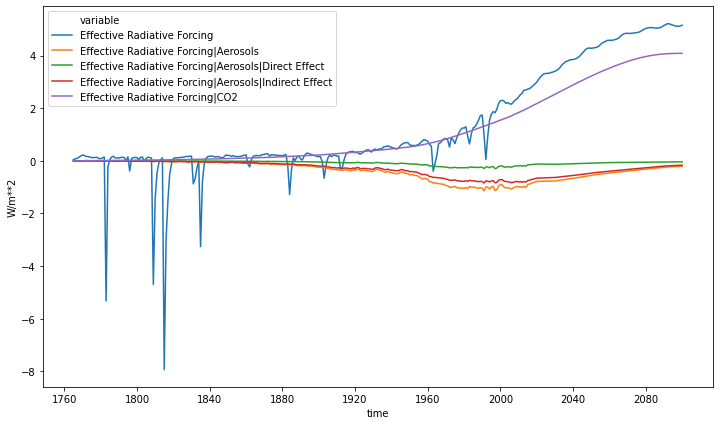

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Effective Radiative Forcing*", scenario="ssp245").lineplot(
    hue="variable", ax=ax
)

In [13]:
rcmip_hist_emms = ScmDataFrame("rcmip-emissions-annual-means-4-0-0-ssp-only.csv")

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  """Entry point for launching an IPython kernel.


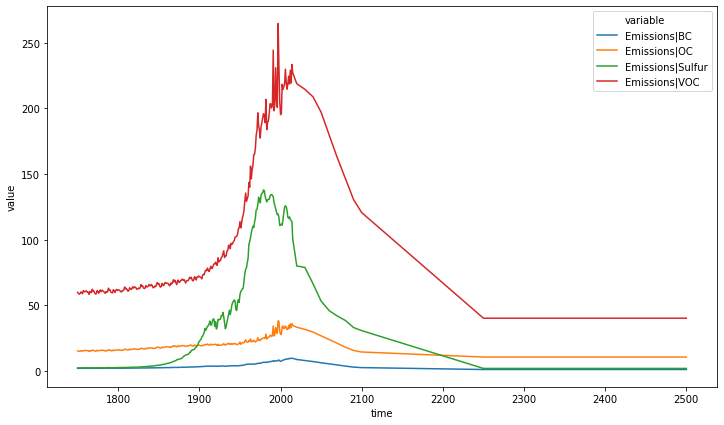

In [14]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
rcmip_hist_emms.filter(
    scenario="ssp245", 
    region="World", 
    variable=["*BC", "*Sulfur", "*OC"]
).lineplot(hue="variable", ax=ax)